<a href="https://colab.research.google.com/github/sarithamiryala/DeepLearning/blob/main/ann_fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset



In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DeepLearning/CampusX/pytorch/fashion-mnist_test.csv")

In [4]:
df.shape

(10000, 785)

In [5]:
df = df[0:6000]

In [6]:
df.shape


(6000, 785)

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


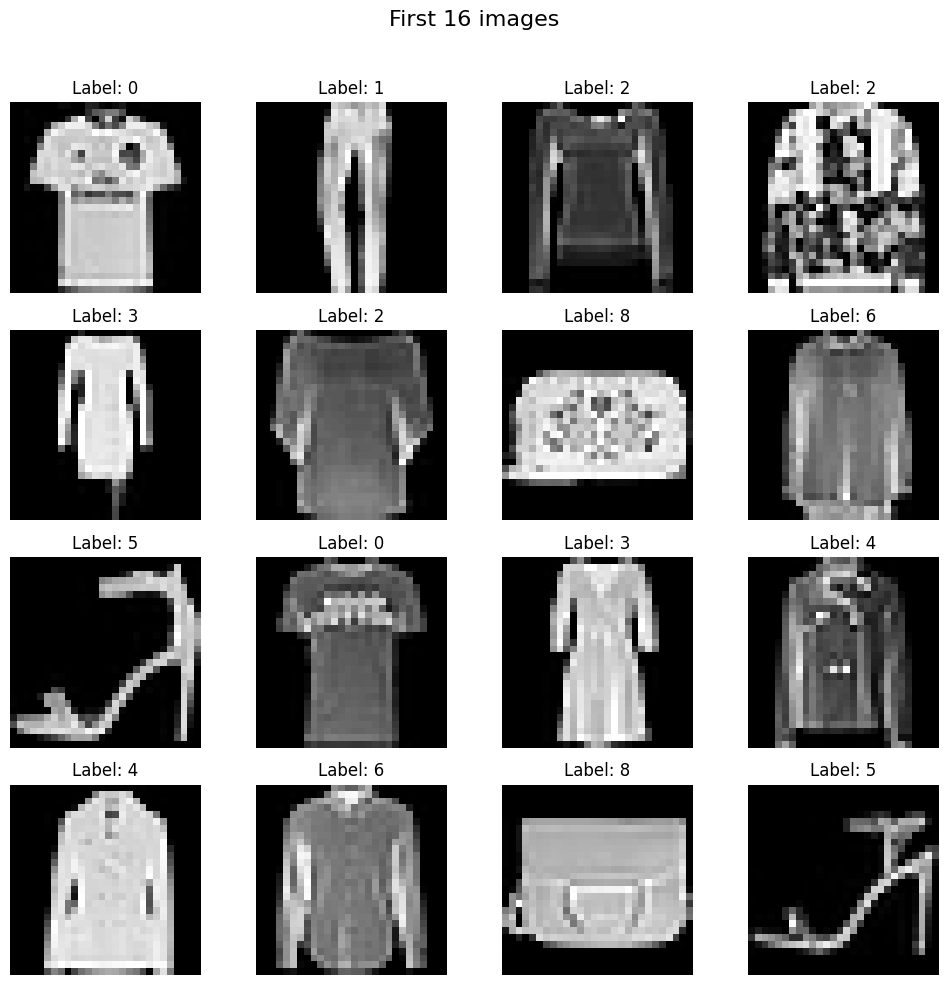

In [8]:
#create a 4x4 grid of images
fig,axes =plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)

#plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i,1:].values.reshape(28,28),cmap="gray")
  ax.set_title(df.iloc[i,0])
  ax.axis("off")
  ax.set_title(f"Label: {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [9]:
#train test split
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [10]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self,features,labels):

    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self,index):

    return self.features[index],self.labels[index]



In [13]:
#create train dataset object
train_dataset = CustomDataset(X_train,y_train)

In [15]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [16]:
#create test dataset object
test_dataset = CustomDataset(X_test,y_test)

In [17]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:
#define NN class

class MYNN(nn.Module):

  def __init__(self,num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)

    )

  def forward(self,x):
    return self.model(x)

In [26]:
#set learning rte and epochs
epochs =100
learning_rate = 0.1

In [28]:
# instatitae the model
model = MYNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)



In [30]:
#training loop

for epoch in range(epochs):
  total_epoch_loss =0

  for batch_features, batch_labels in train_loader:

    #forward pass
    outputs = model(batch_features)

    #calculate loss
    loss = criterion(outputs,batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()
    total_epoch_loss = total_epoch_loss + loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/100, Loss: 1.355922334988912
Epoch 2/100, Loss: 0.7762517126401266
Epoch 3/100, Loss: 0.6514020035664241
Epoch 4/100, Loss: 0.5784355580806733
Epoch 5/100, Loss: 0.5232100874185562
Epoch 6/100, Loss: 0.48779827813307447
Epoch 7/100, Loss: 0.4520306710402171
Epoch 8/100, Loss: 0.43384915053844453
Epoch 9/100, Loss: 0.4203051451345285
Epoch 10/100, Loss: 0.39939648429552715
Epoch 11/100, Loss: 0.384210058649381
Epoch 12/100, Loss: 0.36348020841677986
Epoch 13/100, Loss: 0.33978155692418416
Epoch 14/100, Loss: 0.32893420015772185
Epoch 15/100, Loss: 0.32907804384827616
Epoch 16/100, Loss: 0.30851680785417557
Epoch 17/100, Loss: 0.29702214027444523
Epoch 18/100, Loss: 0.2879842937489351
Epoch 19/100, Loss: 0.2846915353337924
Epoch 20/100, Loss: 0.2805520249903202
Epoch 21/100, Loss: 0.2598085788389047
Epoch 22/100, Loss: 0.2552654310067495
Epoch 23/100, Loss: 0.24844499128560224
Epoch 24/100, Loss: 0.24172145808736484
Epoch 25/100, Loss: 0.23513796051343283
Epoch 26/100, Loss: 0.23

In [31]:
#set model to eval mode
model.eval()

MYNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [32]:
#evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    #forward pass
    outputs = model(batch_features)

    _,predicted = torch.max(outputs,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy: {correct/total*100:.2f}%" )


Accuracy: 83.75%
